In [100]:
using OSMToolset
using OpenStreetMapX
using Downloads
using GZip
using PyCall
using DataFrames
using Statistics
using Plots
include("analyse.jl")
include("prepare_data.jl")

get_POI (generic function with 3 methods)

In [97]:
download_data("Cracow")
download_data("Albuquerque")
download_data("Amsterdam")

"The file is already downloaded"

In [90]:
map = create_map("Cracow.osm")
map_albeq = create_map("Albuquerque.osm")
map_amseterdam = create_map("Amsterdam.osm")

MapData(OpenStreetMapX.Bounds{LLA}(52.21, 52.53, 4.54, 5.21), Dict{Int64, ENU}(46719644 => ENU(-16819.606077161552, 12317.649270787715, -34.02945400293993), 46361005 => ENU(-18298.183501016607, -397.09347703874016, -26.20501489175973), 2180026277 => ENU(-4979.796694610734, -5434.818611699099, -4.256388407657596), 11033160101 => ENU(-1156.9908777379578, -5316.431436126639, -2.3213521357697573), 3032916669 => ENU(-5148.977444465865, 2478.8514062370077, -2.555872642552913), 46417476 => ENU(-15607.684048679252, 924.0096937961721, -19.12331441328581), 46560774 => ENU(7451.951695105986, 5396.894829181829, -6.628344044374444), 46391486 => ENU(21393.93282993412, 340.6004122555347, -35.81419705687094), 4432597381 => ENU(-14602.363692650611, 9977.414704610159, -24.487485835436928), 46602345 => ENU(-4194.974780182706, 7064.364829765754, -5.290424149382943)…), OpenStreetMapX.Way[OpenStreetMapX.Way(4270144, [11497105902, 11497105901, 764717679, 11497105910, 11497105888, 25645953, 11497105900, 11497

In [101]:
#df = get_POI("Cracow.osm",nothing,"Cracow.csv")
#df_albuq = get_POI("Albuquerque.osm",nothing,"Albuquerque.csv")
df_amsterdam = get_POI("Amsterdam.osm",nothing,"Amsterdam.csv")

,elemtype,elemid,nodeid,lat,lon,key,value,group
,Symbol,Int64,Int64,Float64,Float64,String,String,Symbol
1,node,26611122,26611122,52.3638,4.91154,amenity,university,education
2,node,26611707,26611707,52.3628,4.92268,tourism,museum,leisure
3,node,26654664,26654664,52.3813,4.9132,amenity,school,education
4,node,26859315,26859315,52.4267,5.07409,tourism,camp_site,leisure
5,node,26924442,26924442,52.4136,5.06736,tourism,viewpoint,leisure
6,node,27331669,27331669,52.3605,4.86303,amenity,parking,parking
7,node,27331669,27331669,52.3605,4.86303,parking,underground,parking
8,node,28836479,28836479,52.3542,4.8663,tourism,hotel,leisure
9,node,30118637,30118637,52.3689,4.97073,shop,convenience,shopping


In [92]:
center = LLA(50.061692315544654, 19.939496620660737)
center_albuquerque = LLA(35.08423721432912, -106.65041238006276)
center_amsterdam = LLA(52.367580788364805, 4.9041322375431236)
ix = AttractivenessSpatIndex(df)
ix_albuquerque = AttractivenessSpatIndex(df_albuq)
ix_amsterdam = AttractivenessSpatIndex(df_amsterdam)

AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(SpatialIndexing.RTree{Float64, 2, SpatialIndexing.SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMetaPOI}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capacity=100)
78897 element(s) in 3 level(s) (1, 8, 800 node(s) per level):
 level=3 nchildren=8 mbr=((-32628.955145591346, -27937.44184844404), (31461.958874106433, 26048.474994451066)), 78897×10 DataFrame
   Row │ elemtype  elemid    nodeid       lat      lon      key      value     ⋯
       │ Symbol    Int64     Int64        Float64  Float64  String   String    ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ node      26611122     26611122  52.3638  4.91154  amenity  universit ⋯
     2 │ node      26611707     26611707  52.3628  4.92268  tourism  museum
     3 │ node      26654664     266546

In [102]:
#points = generate_sectors(10,1000,center,200)
#points_albuq = generate_sectors(10,1000,center_albuquerque,200)
points_amsterdam = generate_sectors(10,1000,center_amsterdam,200)

10×200 Matrix{LLA}:
 LLA(52.3678, 4.91448, 0.0388814)  …  LLA(52.3676, 4.91588, 0.050066)
 LLA(52.3681, 4.93328, 0.308548)      LLA(52.3676, 4.92138, 0.108004)
 LLA(52.3681, 4.93388, 0.321419)      LLA(52.3676, 4.94358, 0.564804)
 LLA(52.3684, 4.94904, 0.732498)      LLA(52.3676, 4.96243, 1.23357)
 LLA(52.3687, 4.96428, 1.31438)       LLA(52.3676, 4.97732, 1.94398)
 LLA(52.3692, 4.99083, 2.73051)    …  LLA(52.3676, 4.98439, 2.33809)
 LLA(52.3694, 5.00216, 3.49073)       LLA(52.3675, 4.99275, 2.85011)
 LLA(52.3697, 5.01777, 4.69131)       LLA(52.3675, 5.02048, 4.91316)
 LLA(52.3699, 5.02574, 5.37227)       LLA(52.3675, 5.02533, 5.33085)
 LLA(52.3702, 5.0441, 7.11669)        LLA(52.3675, 5.03964, 6.66447)

In [103]:
#attr = calculate_attractiveness_of_sector(points,ix,:education)
#attr_alb = calculate_attractiveness_of_sector(points_albuq,ix_albuquerque,:education)
attr_amsterdam = calculate_attractiveness_of_sector(points_amsterdam,ix_amsterdam,:transport)

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [95]:
x_axis = [i for i in 1:10]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

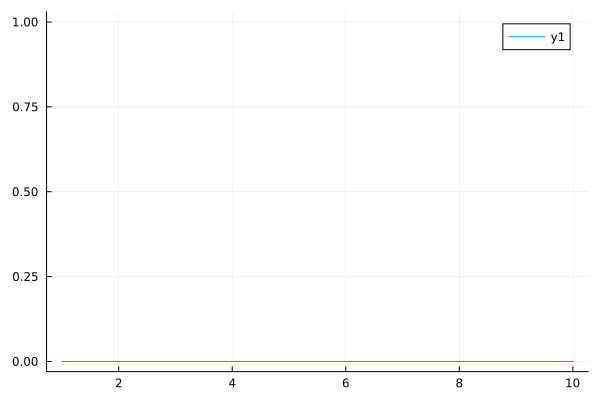

In [96]:
plot(x_axis,attr)
plot(x_axis,attr_alb)
plot(x_axis,attr_amsterdam)